### PREPROCESSING

In [1]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score, f1_score, confusion_matrix, classification_report
from sklearn.base import is_classifier, is_regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
def Imputation(df):
    df_copy = df.copy()
    simpleImpute = SimpleImputer(strategy='mean')
    # On applique l'imputation sur les colonnes numériques
    cols_num = df_copy.select_dtypes(include=['float64','int64']).columns
    
    # Il est préférable d'appliquer l'imputation globalement ou colonne par colonne proprement
    # Ici on le fait pour toutes les colonnes numériques d'un coup
    if len(cols_num) > 0:
        df_copy[cols_num] = simpleImpute.fit_transform(df_copy[cols_num])
        
    return df_copy

In [4]:
for col in train.select_dtypes('object'):
    print(f'{col :-<50} {train[col].unique()} ')

MSZoning------------------------------------------ ['RL' 'RM' 'C (all)' 'FV' 'RH'] 
Street-------------------------------------------- ['Pave' 'Grvl'] 
Alley--------------------------------------------- [nan 'Grvl' 'Pave'] 
LotShape------------------------------------------ ['Reg' 'IR1' 'IR2' 'IR3'] 
LandContour--------------------------------------- ['Lvl' 'Bnk' 'Low' 'HLS'] 
Utilities----------------------------------------- ['AllPub' 'NoSeWa'] 
LotConfig----------------------------------------- ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 
LandSlope----------------------------------------- ['Gtl' 'Mod' 'Sev'] 
Neighborhood-------------------------------------- ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 
Condition1---------------------------------------- ['Norm' 'Feedr' 'PosN' 'Artery' '

In [5]:
# Attention : L'encodage et l'imputation manuels ici peuvent introduire de la fuite de données (data leakage)
# Ideallemennt, on utiliserait le Pipeline scikit-learn (voir section pipeline plus bas).
# Pour ce notebook, nous allons corriger la fonction pour éviter les erreurs, mais privilégiez l'approche Pipeline.

def Encoding(df):
    # Nous utilisons une copie pour ne pas modifier l'original en place si nécessaire
    df_copy = df.copy()
    # On force l'encodage ordinal pour les besoins de la démonstration manuelle
    # Mais attention : fit_transform sur le test set est interdit en pratique stricte !
    # Ici on simplifie pour l'exemple pédagogique avant le pipeline.
    ordEncode = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    
    # On récupère les colonnes de type object du dataframe passé en argument
    cols_object = df_copy.select_dtypes('object').columns
    
    for col in cols_object:
        # Transformation reshape(-1, 1) nécessaire pour sklearn
        data_col = df_copy[col].values.reshape(-1, 1)
        df_copy[col] = ordEncode.fit_transform(data_col)
        
    return df_copy

In [6]:
def prepocessing(df):
    df = Encoding(df)
    df = Imputation(df)
    
    X = df.drop('SalePrice', axis=1)
    y = df['SalePrice']
    return X, y


In [7]:
#train.dropna(axis=1)

In [8]:
X_train , y_train = prepocessing(train)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print("Dimensions train:", X_train.shape, y_train.shape)
print("Dimensions val:", X_val.shape, y_val.shape)

Dimensions train: (1168, 80) (1168,)
Dimensions val: (292, 80) (292,)


In [10]:
pd.set_option('display.max_row',111)
y_train.isna()

618     False
870     False
92      False
817     False
302     False
        ...  
763     False
835     False
1216    False
559     False
684     False
Name: SalePrice, Length: 1168, dtype: bool

In [11]:
X_train.shape

(1168, 80)

In [12]:
X_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
y_train=y_train.values.reshape(-1,1)

In [14]:
y_train.shape

(1168, 1)

In [15]:
train.shape

(1460, 81)

In [16]:
train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [17]:
X_test = Encoding(test)
X_test = Imputation(test)

X_test.shape

(1459, 80)

### MODELISATIOn

In [18]:
modele1 = RandomForestRegressor(random_state=0)
modele2 = LinearRegression()
modele3 = DecisionTreeRegressor(random_state=0)

In [19]:
def evaluation(modele, X_train, y_train, X_test, y_test):
    # s'assurer que y est 1D
    ytr = np.ravel(y_train)
    yte = np.ravel(y_test)

    # entraînement et prédiction
    modele.fit(X_train, ytr)
    y_pred = modele.predict(X_test)

    # métriques adaptées
    if is_regressor(modele):
        print("MSE :", mean_squared_error(yte, y_pred))
        print("R2  :", r2_score(yte, y_pred))
        scoring = 'r2'  # ou 'neg_mean_squared_error'
    elif is_classifier(modele):
        print(confusion_matrix(yte, y_pred))
        print(classification_report(yte, y_pred))
        scoring = 'f1'
    else:
        print("Type de modèle non pris en charge pour l'évaluation.")
        return

    # courbe d'apprentissage (si utile)
    try:
        N, train_score, val_score = learning_curve(
            modele, X_train, ytr, cv=4, scoring=scoring, train_sizes=np.linspace(0.1,1,10)
        )
        plt.figure(figsize=(8,5))
        plt.plot(N, np.mean(train_score, axis=1), label='train score')
        plt.plot(N, np.mean(val_score, axis=1), label='validation score')
        plt.xlabel("Nombre d'échantillons d'entraînement")
        plt.ylabel(f"Score ({scoring})")
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        print("Impossible de tracer la courbe d'apprentissage :", e)

MSE : 1124390194.8819714
R2  : 0.8371829389947936


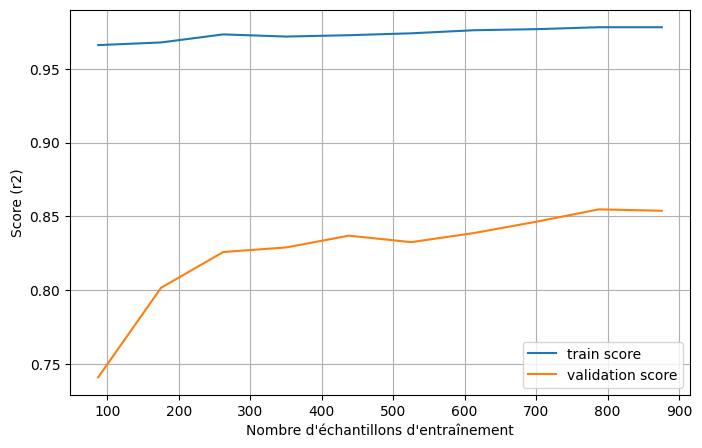

In [20]:
evaluation(modele1, X_train, y_train, X_val, y_val)

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [ ]:


# On recharge les données pour l'exemple Pipeline
df_raw = pd.read_csv("../data/train.csv")
X_raw = df_raw.drop('SalePrice', axis=1)
y_raw = df_raw['SalePrice']

X_train_pipe, X_val_pipe, y_train_pipe, y_val_pipe = train_test_split(X_raw, y_raw, test_size=0.2, random_state=0)

# Définition des colonnes
num_cols = X_train_pipe.select_dtypes(include=['int64','float64']).columns
cat_cols = X_train_pipe.select_dtypes(include=['object','category']).columns

# Pipelines individuels
num_pipe = make_pipeline(SimpleImputer(strategy='median'))
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False pour faciliter la visualisation si besoin
)

# Préprocesseur global
preproc = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

# Pipeline final avec Modèle
pipe = make_pipeline(preproc, RandomForestRegressor(random_state=0))

# Entraînement
pipe.fit(X_train_pipe, y_train_pipe)

# Score
validation_score = pipe.score(X_val_pipe, y_val_pipe)
print(f"R2 Score avec Pipeline complet : {validation_score:.4f}")

R2 Score avec Pipeline complet : 0.8316
